# **Customer Shopping Report**

## **Business Understanding**

### Tujuan Bisnis:
Perusahaan ritel ingin memahami perilaku konsumen dan pola pembelian untuk meningkatkan strategi pemasaran, mengoptimalkan penempatan produk di berbagai kategori, serta meningkatkan efisiensi operasional. Dengan menganalisis data transaksi pelanggan, manajemen berharap dapat:

- Mengetahui **kategori produk** yang paling banyak menghasilkan pendapatan.
- Mengidentifikasi **pola belanja berdasarkan waktu** (musiman, bulanan).
- Menganalisis **perbedaan perilaku belanja antar gender dan usia**.
- Menentukan **shopping mall dengan kinerja terbaik**.
- Mengevaluasi efektivitas **metode pembayaran** yang tersedia.

Dengan informasi tersebut, perusahaan dapat mengambil keputusan yang lebih tepat dalam hal pengelolaan inventaris, penargetan promosi, dan strategi penjualan lintas kanal.

---

## **Problem Statement**

Dalam industri ritel yang sangat kompetitif, pemahaman yang baik terhadap perilaku pelanggan menjadi kunci keberhasilan bisnis. Perusahaan sering kali menghadapi tantangan berikut:

1. **Kurangnya pemahaman terhadap produk yang paling menguntungkan**  
   Banyak perusahaan gagal mengidentifikasi produk atau kategori mana yang benar-benar memberikan kontribusi besar terhadap pendapatan.

2. **Minimnya segmentasi pelanggan berdasarkan demografi dan preferensi**  
   Tanpa analisis berbasis data, strategi pemasaran menjadi kurang tepat sasaran.

3. **Ketidaktahuan terhadap tren penjualan musiman atau waktu puncak transaksi**  
   Tanpa mengetahui tren waktu, perusahaan tidak dapat mempersiapkan stok atau promosi dengan optimal.

4. **Tidak meratanya performa antar lokasi shopping mall**  
   Beberapa lokasi mungkin berkinerja buruk tanpa diketahui sebabnya, padahal ini bisa diatasi dengan pendekatan berbasis data.

5. **Kurangnya evaluasi atas preferensi metode pembayaran**  
   Pemahaman terhadap preferensi metode pembayaran sangat penting untuk meningkatkan pengalaman pelanggan.

---

### Rumusan Masalah:

- Produk atau kategori apa yang paling banyak memberikan kontribusi terhadap total pendapatan?
- Bagaimana pola pembelian pelanggan berdasarkan waktu dan demografi (gender, usia)?
- Mall mana saja yang menunjukkan performa penjualan terbaik?
- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?


## **Data Understanding**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max.columns', None)

pd.set_option('display.float.format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


###  **Data Source**

| Nama Kolom      | Tipe Data | Deskripsi                                                    |
| --------------- | --------- | ------------------------------------------------------------ |
| `Invoice ID`    | Object    | ID unik untuk setiap transaksi pembelian                     |
| `Branch`        | Object    | Lokasi toko tempat transaksi dilakukan (misal: A, B, atau C) |
| `Customer Type` | Object    | Jenis pelanggan: Member atau Normal                          |
| `Gender`        | Object    | Jenis kelamin pelanggan (Male / Female)                      |
| `Product Line`  | Object    | Kategori produk yang dibeli                                  |
| `Unit Price`    | Float     | Harga satuan dari produk yang dibeli                         |
| `Quantity`      | Integer   | Jumlah unit produk yang dibeli                               |
| `Tax`           | Float     | Pajak 5% dari subtotal pembelian                             |
| `Total`         | Float     | Total pembayaran setelah pajak (Subtotal + Pajak)            |
| `Date`          | Object    | Tanggal transaksi                                            |
| `Time`          | Object    | Waktu transaksi                                              |
| `Payment`       | Object    | Metode pembayaran (misal: Cash, Credit Card, Ewallet)        |
| `Rating`        | Float     | Penilaian pelanggan terhadap pengalaman belanja (skala 1–10) |


In [3]:
# Buat dataframe ringkasan informasi
info_df = pd.DataFrame({
    'Nama Kolom': df.columns,
    'Tipe Data': df.dtypes.values,
    'Jumlah Unik': [df[col].nunique() for col in df.columns],
    'Missing Values': df.isnull().sum().values,
    'Contoh Nilai': [df[col].dropna().unique()[:3] for col in df.columns]
})

# Tampilkan tabel informasi
info_df


,Nama Kolom,Tipe Data,Jumlah Unik,Missing Values,Contoh Nilai
0,invoice_no,object,99457,0,"[I138884, I317333, I127801]"
1,customer_id,object,99457,0,"[C241288, C111565, C266599]"
2,gender,object,2,0,"[Female, Male]"
3,age,int64,52,0,"[28, 21, 20]"
4,category,object,8,0,"[Clothing, Shoes, Books]"
5,quantity,int64,5,0,"[5, 3, 1]"
6,price,float64,40,0,"[1500.4, 1800.51, 300.08]"
7,payment_method,object,3,0,"[Credit Card, Debit Card, Cash]"
8,invoice_date,object,797,0,"[5/8/2022, 12/12/2021, 9/11/2021]"
9,shopping_mall,object,10,0,"[Kanyon, Forum Istanbul, Metrocity]"


In [4]:
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,age,quantity,price
count,99457.00,99457.00,99457.00
mean,43.43,3.00,689.26
std,14.99,1.41,941.18
min,18.00,1.00,5.23
25%,30.00,2.00,45.45
50%,43.00,3.00,203.30
75%,56.00,4.00,1200.32
max,69.00,5.00,5250.00


In [7]:
df['customer_id'].nunique()

99457

In [8]:
df['customer_id'].value_counts()

customer_id
C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: count, Length: 99457, dtype: int64

In [9]:
df['invoice_no'].nunique()

99457

In [10]:
df['invoice_no'].value_counts()

invoice_no
I138884    1
I291671    1
I175779    1
I226143    1
I683818    1
          ..
I319287    1
I173400    1
I828064    1
I194850    1
I232867    1
Name: count, Length: 99457, dtype: int64

In [11]:
df['invoice_date'].nunique()

797

In [12]:
df['invoice_date'].value_counts()

invoice_date
24/11/2021    159
26/02/2023    156
6/1/2021      155
25/07/2022    155
23/10/2022    155
             ... 
27/10/2021     98
29/05/2021     98
30/09/2021     96
2/12/2021      94
16/01/2022     93
Name: count, Length: 797, dtype: int64

In [13]:
df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [14]:
df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [15]:
df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [16]:
df['total_spend'] = df['quantity'] * df['price']
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_spend
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [17]:
df.to_csv('customer_shopping_data_clean.csv', index=False)

---

# **Exploratory Data Analyst**

### Analisis Outlier

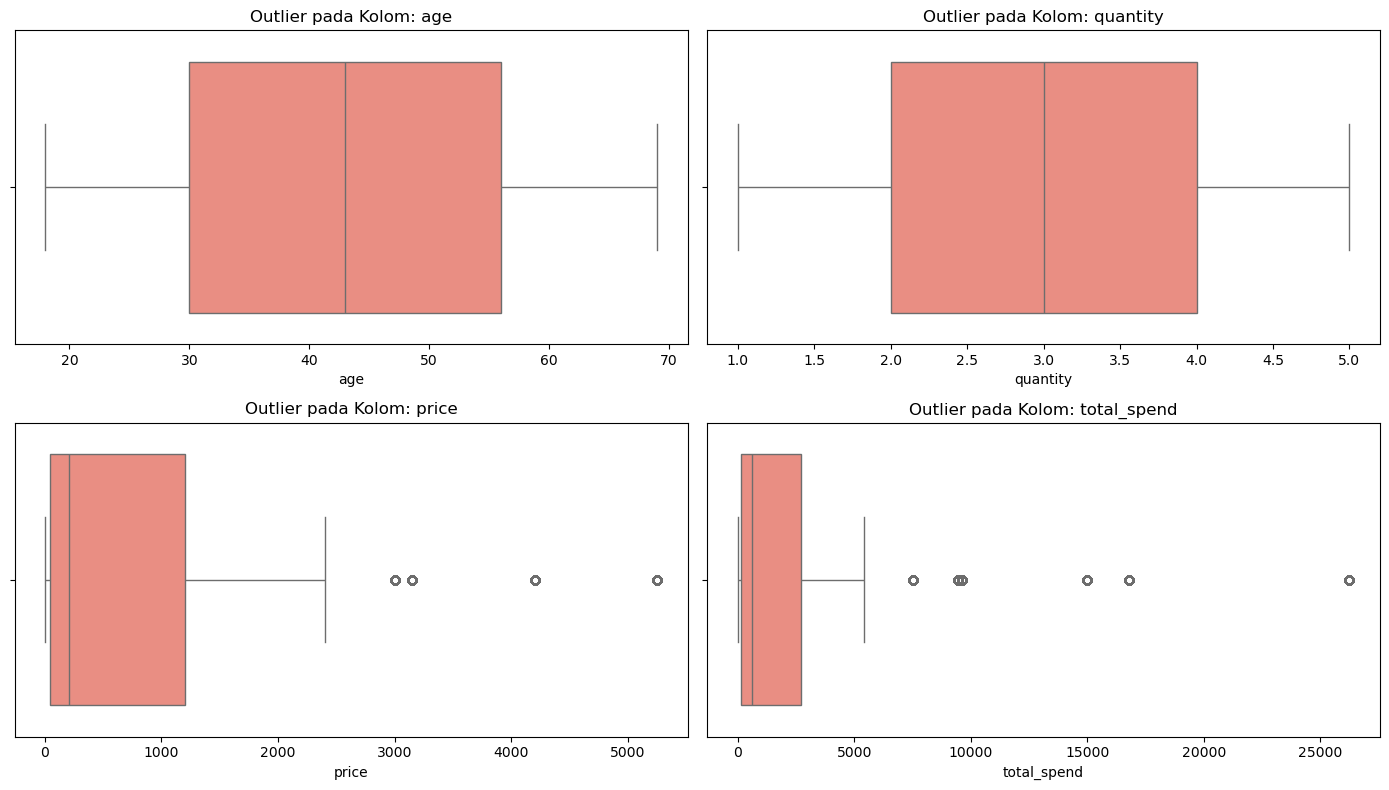

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang relevan
num_cols = ['age', 'quantity', 'price', 'total_spend']

# Boxplot
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Outlier pada Kolom: {col}')
plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import zscore

# Hitung z-score untuk setiap kolom numerik
z_scores = np.abs(zscore(df[num_cols]))

# Threshold z > 3 → outlier
outlier_flags = z_scores > 3

# Rekapitulasi jumlah outlier
outlier_summary = pd.DataFrame({
    'Kolom': num_cols,
    'Jumlah Outlier': outlier_flags.sum(axis=0),
    'Total Data': len(df),
    'Persentase Outlier (%)': (outlier_flags.sum(axis=0) / len(df) * 100).round(2)
})
outlier_summary


,Kolom,Jumlah Outlier,Total Data,Persentase Outlier (%)
age,age,0,99457,0.00
quantity,quantity,0,99457,0.00
price,price,2002,99457,2.01
total_spend,total_spend,2002,99457,2.01


| Kolom            | Insight Bisnis dari Outlier                                                                      |
| ---------------- | ------------------------------------------------------------------------------------------------ |
| **age**          | Outlier menunjukkan pelanggan yang sangat muda atau sangat tua – insight demografi ekstrem.      |
| **quantity**     | Jumlah barang sangat besar bisa berarti pembelian grosir atau kebutuhan bisnis.                  |
| **price**        | Produk dengan harga sangat tinggi bisa menunjukkan barang eksklusif / premium.                   |
| **total\_spend** | Transaksi dengan total sangat tinggi perlu dicermati — bisa pelanggan VIP atau potensi penipuan. |


### Analisis Korelasi Heatmap

Matriks Korelasi:
             age  quantity  price  total_spend
age         1.00      0.00   0.00         0.00
quantity    0.00      1.00   0.34         0.46
price       0.00      0.34   1.00         0.96
total_spend 0.00      0.46   0.96         1.00


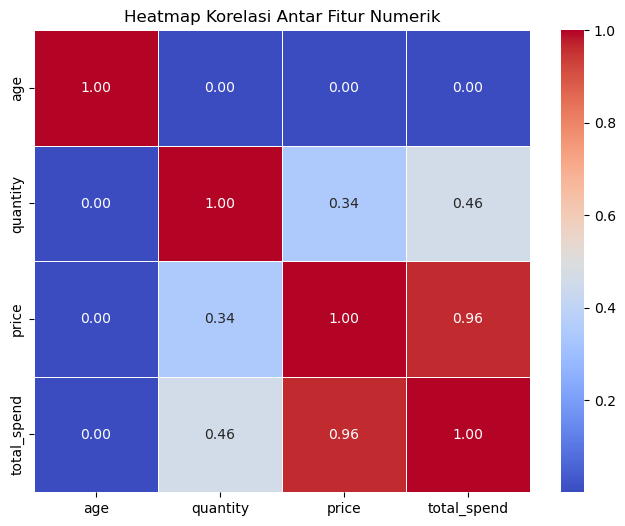

In [20]:
# Pilih hanya kolom numerik untuk korelasi
numeric_cols = ['age', 'quantity', 'price', 'total_spend']
numeric_df = df[numeric_cols]

# Hitung matriks korelasi
corr_matrix = numeric_df.corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


## Interpretasi Heatmap Korelasi

### Ringkasan Korelasi Antar Fitur Numerik

| Fitur 1      | Fitur 2      | Korelasi | Interpretasi                                                                 |
|--------------|--------------|----------|-------------------------------------------------------------------------------|
| `price`      | `total_spend`| **0.96** | Korelasi sangat kuat. Semakin tinggi harga produk, semakin tinggi total belanja. |
| `quantity`   | `total_spend`| **0.46** | Korelasi sedang. Pembelian dalam jumlah besar cukup berkontribusi terhadap total transaksi. |
| `quantity`   | `price`      | **0.34** | Korelasi lemah-positif. Produk mahal sedikit lebih sering dibeli dalam jumlah besar. |
| `age`        | Fitur lain   | ~0.00    | Hampir tidak ada korelasi. Umur pelanggan tidak memengaruhi pola pembelian.    |

---

### Insight Bisnis

-  **Harga produk** merupakan faktor paling berpengaruh terhadap total nilai transaksi.
-  **Jumlah barang yang dibeli (quantity)** juga berdampak, namun pengaruhnya tidak sebesar harga satuan.
-  **Usia pelanggan tidak berkorelasi** dengan pembelian, menunjukkan bahwa strategi pemasaran tidak perlu terlalu fokus pada segmentasi umur.
-  Fokuskan strategi upselling pada produk dengan harga tinggi untuk meningkatkan nilai transaksi.

---

>  Rekomendasi: Gunakan hasil korelasi ini untuk memperkuat strategi pricing dan identifikasi pelanggan high-value berdasarkan kombinasi quantity dan price.


### **Top 10 Product Categories by Total Spend**

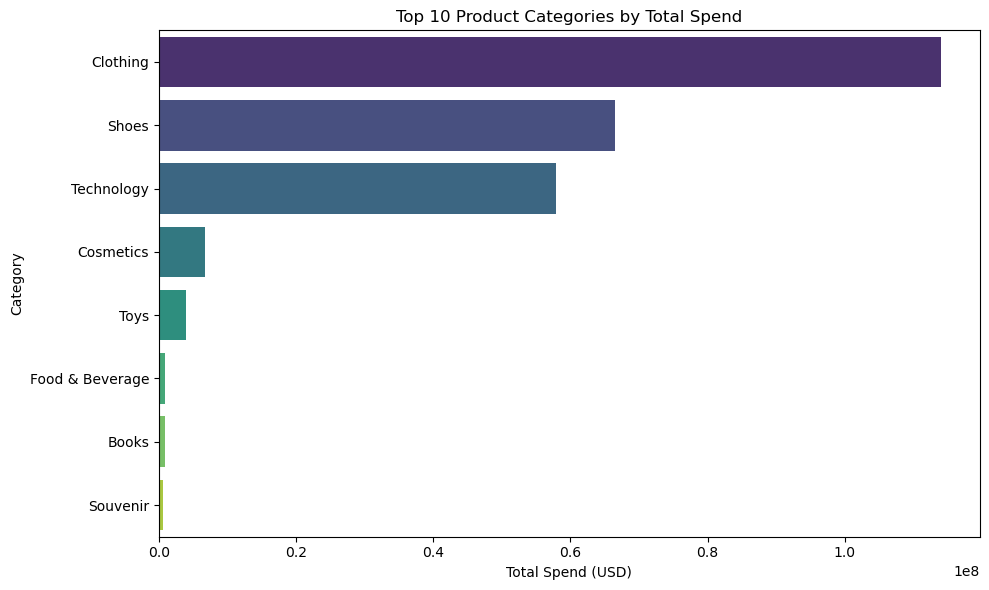

In [21]:
top_categories = df.groupby('category')['total_spend'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 Product Categories by Total Spend')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


### Interpretasi Visualisasi: Top 10 Product Categories by Total Spend

Visualisasi ini menampilkan 10 kategori produk dengan total pengeluaran tertinggi oleh konsumen (Total Spend dalam USD).

#### Insight Utama:
- **Clothing (Pakaian)** menjadi kategori dengan total pengeluaran tertinggi, menunjukkan dominasi dalam kontribusi pendapatan.
- **Shoes (Sepatu)** dan **Technology (Teknologi)** berada di peringkat kedua dan ketiga, menandakan tingginya minat konsumen di sektor fashion dan elektronik.
- Kategori seperti **Cosmetics**, **Toys**, dan **Food & Beverage** memiliki pengeluaran yang lebih kecil, namun masih masuk dalam 10 besar.
- Kategori **Books** dan **Souvenir** memiliki total pengeluaran paling rendah, mengindikasikan rendahnya minat atau volume transaksi.

#### Implikasi Bisnis:
- **Fokus Strategis**: Perusahaan dapat memprioritaskan stok, promosi, dan strategi pemasaran untuk kategori pakaian, sepatu, dan teknologi.
- **Efisiensi Kategori Rendah**: Perlu evaluasi terhadap kategori dengan performa rendah, apakah disebabkan oleh kurangnya promosi, segmentasi pasar yang sempit, atau faktor lainnya.
- **Peluang Peningkatan**: Kategori terbawah bisa ditingkatkan dengan strategi seperti bundling, diskon musiman, atau kampanye khusus.

#### Rekomendasi:
- Lakukan analisis margin keuntungan untuk memastikan kategori dengan pengeluaran besar juga memberikan keuntungan maksimal.
- Telusuri tren penjualan dari waktu ke waktu untuk mendeteksi pola musiman atau momentum khusus.
- Gunakan segmentasi pelanggan untuk memahami siapa pembeli utama dari masing-masing kategori, agar promosi lebih tepat sasaran.


### **Monthly Sales Trend**

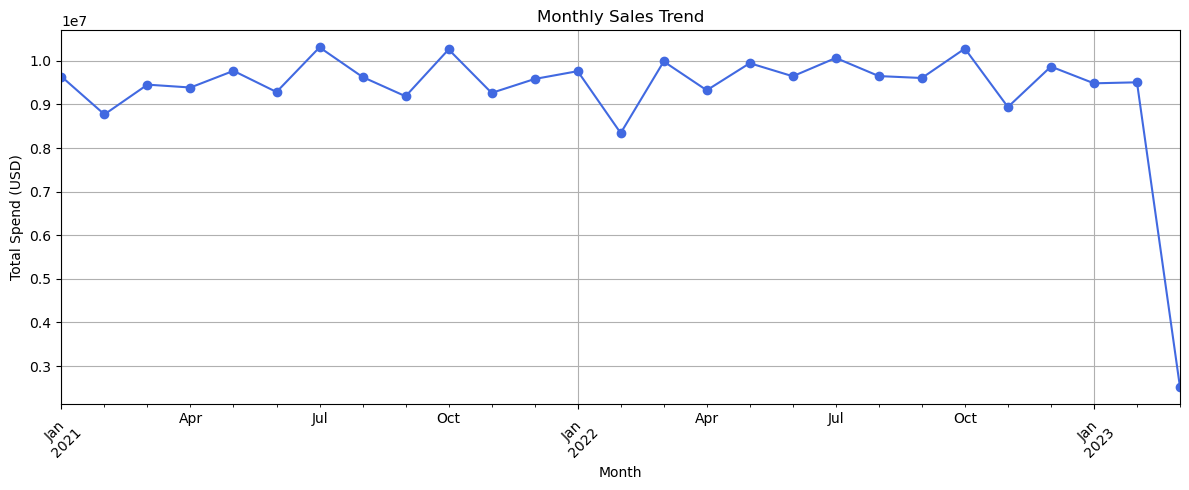

In [22]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
daily_sales = df.groupby(df['invoice_date'].dt.to_period('M'))['total_spend'].sum()

plt.figure(figsize=(12, 5))
daily_sales.plot(marker='o', color='royalblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Spend (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretasi Visualisasi: Monthly Sales Trend

Visualisasi ini menampilkan tren penjualan bulanan berdasarkan total pengeluaran konsumen (Total Spend) dari Januari 2021 hingga Januari 2023.

#### Insight Utama:
- Penjualan bulanan relatif stabil sepanjang periode, dengan total pengeluaran konsisten di kisaran **9 hingga 10 juta USD** per bulan.
- Terdapat beberapa **puncak penjualan** signifikan, seperti pada bulan Juni 2021, September 2021, dan Oktober 2022.
- Terdapat **penurunan tajam di Januari 2023**, yang kemungkinan besar disebabkan oleh data yang belum lengkap untuk bulan tersebut atau adanya faktor musiman/pelaporan.

#### Pola yang Teridentifikasi:
- Fluktuasi ringan terlihat secara periodik, namun tidak menunjukkan tren naik atau turun jangka panjang yang jelas.
- Periode seperti Januari–Maret cenderung lebih rendah dibanding pertengahan tahun (Juni–September), yang bisa menunjukkan pola musiman.

#### Implikasi Bisnis:
- **Stabilitas Penjualan**: Menandakan bahwa strategi penjualan dan produk memiliki performa yang cukup konsisten.
- **Peluang Optimalisasi Musiman**: Pola peningkatan di bulan-bulan tertentu dapat dimanfaatkan untuk kampanye promosi dan persediaan.
- **Evaluasi Data Januari 2023**: Penting untuk memeriksa apakah data Januari 2023 sudah lengkap. Jika belum, perlu dikecualikan dari analisis agregat agar tidak menurunkan rata-rata secara keseluruhan.

#### Rekomendasi:
- Lakukan analisis lanjutan untuk mengidentifikasi penyebab fluktuasi tiap bulan, misalnya: event khusus, kampanye pemasaran, atau musim liburan.
- Bandingkan tren ini dengan kategori produk untuk mengetahui kontribusi tiap kategori terhadap total penjualan bulanan.
- Lakukan perbandingan year-over-year (YoY) untuk mengukur pertumbuhan dan kinerja tahunan secara objektif.


### **Customer Gender Distribution**

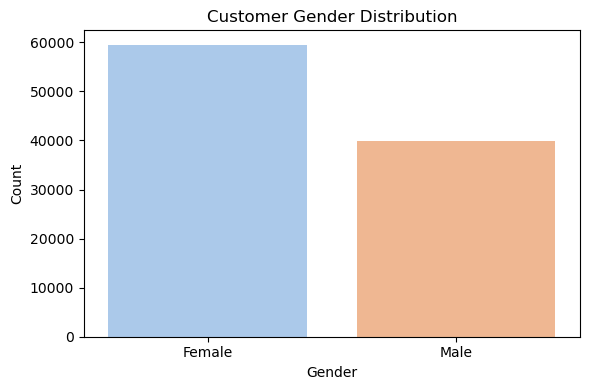

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Interpretasi Visualisasi: Customer Gender Distribution

Visualisasi ini menunjukkan distribusi jumlah pelanggan berdasarkan gender.

#### Insight Utama:
- Pelanggan perempuan (**Female**) mendominasi dengan jumlah lebih banyak dibandingkan pelanggan laki-laki (**Male**).
- Terdapat sekitar **60.000 pelanggan perempuan** dan sekitar **40.000 pelanggan laki-laki**, menunjukkan selisih signifikan sekitar 20.000 pelanggan.

#### Implikasi Bisnis:
- **Strategi Pemasaran**: Karena mayoritas pelanggan adalah perempuan, strategi pemasaran, pemilihan produk, serta komunikasi brand dapat disesuaikan untuk lebih relevan dengan segmen ini.
- **Peluang Ekspansi**: Perusahaan dapat mengeksplorasi pendekatan khusus untuk menarik l


### **Top 10 Shopping Malls by Revenue**

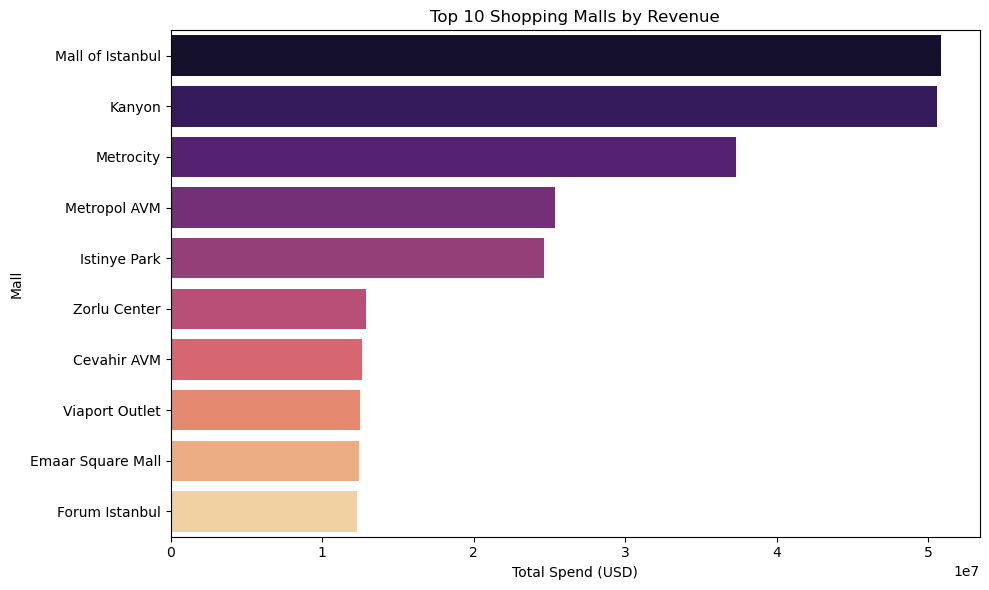

In [24]:
top_malls = df.groupby('shopping_mall')['total_spend'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_malls.values, y=top_malls.index, palette='magma')
plt.title('Top 10 Shopping Malls by Revenue')
plt.xlabel('Total Spend (USD)')
plt.ylabel('Mall')
plt.tight_layout()
plt.show()


### Interpretasi Visualisasi: Top 10 Shopping Malls by Revenue

Visualisasi ini menunjukkan 10 pusat perbelanjaan (mall) dengan total pengeluaran (revenue) tertinggi dari pelanggan.

#### Insight Utama:
- **Mall of Istanbul** dan **Kanyon** menduduki dua posisi teratas dengan total pendapatan paling besar, masing-masing mendekati **50 juta USD**.
- **Metrocity**, **Metropol AVM**, dan **Istinye Park** juga merupakan mall dengan kontribusi pendapatan signifikan, meskipun dengan selisih yang cukup mencolok dari dua teratas.
- Mall lainnya seperti **Zorlu Center**, **Cevahir AVM**, **Viaport Outlet**, **Emaar Square Mall**, dan **Forum Istanbul** berada di peringkat bawah namun tetap masuk dalam 10 besar.

#### Implikasi Bisnis:
- **Mall of Istanbul & Kanyon** dapat dikategorikan sebagai lokasi strategis dengan potensi ROI tinggi bagi pelaku bisnis atau brand yang ingin membuka gerai.
- Perbedaan revenue yang signifikan antar mall dapat disebabkan oleh faktor seperti lokasi, daya beli pengunjung, tenant mix, serta kualitas pengalaman berbelanja.
- Mall di peringkat bawah tetap menunjukkan performa baik dan bisa jadi memiliki peluang pengembangan lebih lanjut dengan strategi yang tepat.

#### Rekomendasi:
- Lakukan analisis lebih lanjut terkait profil pelanggan pada tiap mall untuk memahami apa yang membuat Mall of Istanbul dan Kanyon unggul.
- Evaluasi efektivitas kampanye pemasaran dan event di mall peringkat bawah untuk mendorong peningkatan revenue.
- Pertimbangkan untuk menambah investasi (seperti gerai baru atau promosi khusus) pada mall dengan pertumbuhan potensial seperti Metrocity dan Istinye Park.



### **Distribusi Penggunaan Metode Pembayaran oleh Pelanggan**

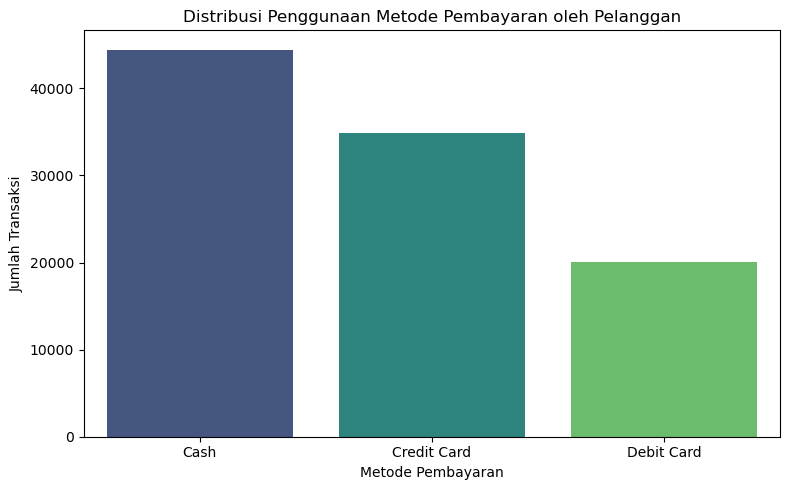

In [26]:
# Hitung jumlah transaksi per metode pembayaran
payment_counts = df['payment_method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Transaction Count']

# Visualisasi
plt.figure(figsize=(8,5))
sns.barplot(x='Payment Method', y='Transaction Count', data=payment_counts, palette='viridis')
plt.title('Distribusi Penggunaan Metode Pembayaran oleh Pelanggan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Cash paling banyak digunakan, diikuti Credit dan Debit.
- Hal ini menunjukkan pelanggan masih nyaman menggunakan cash.
- Rekomendasi: Pertimbangkan promosi untuk mendorong penggunaan debit/credit agar proses transaksi lebih cepat dan efisiensi kasir meningkat

---

## **Kesimpulan**

Analisis yang telah dilakukan berhasil menjawab pertanyaan utama yang telah ditetapkan di awal proyek, yaitu mengidentifikasi **kategori produk teratas, tren penjualan, segmentasi pelanggan, dan mall dengan performa terbaik**.

- **Kategori Teratas:** Pakaian, Sepatu, dan Teknologi merupakan kategori dengan kontribusi revenue tertinggi, menunjukkan potensi fokus untuk promosi dan pengelolaan stok.
- **Tren Penjualan:** Penjualan secara keseluruhan stabil dengan adanya peningkatan musiman, menjadi acuan untuk perencanaan inventori dan kampanye pemasaran musiman.
- **Segmentasi Pelanggan:** Mayoritas pelanggan adalah perempuan dengan dominasi usia produktif, sehingga dapat menjadi target utama kampanye pemasaran yang lebih tertarget.
- **Mall dengan Performa Terbaik:** Mall of Istanbul dan Kanyon menunjukkan performa penjualan terbaik, menjadi prioritas penguatan aktivitas penjualan dan promosi di lokasi tersebut.


## **Recommendation Ideas**

- Kategori Teratas (Pakaian, Sepatu, Teknologi):
Rekomendasi: Prioritaskan pengelolaan stok dan promosi pada kategori ini. Pertimbangkan untuk membuat paket bundling produk populer (misalnya ide premium coffee bundle) atau menonjolkan produk-produk ini dalam kampanye pemasaran. Lakukan analisis margin keuntungan pada kategori teratas ini untuk memastikan bahwa pendapatan tinggi juga memberikan keuntungan yang optimal.

- Tren Penjualan dari Waktu ke Waktu:
Rekomendasi: Rencanakan stok dan penjadwalan tenaga kerja berdasarkan periode puncak penjualan (misalnya pada saat libur atau event promosi). Selidiki penyebab kenaikan atau penurunan penjualan (event khusus, promosi) dan tiru kembali strategi yang sukses. Terapkan prakiraan penjualan secara rutin untuk mengantisipasi permintaan.

- Demografi Pelanggan (lebih banyak perempuan, pola usia):
Rekomendasi: Sesuaikan kampanye pemasaran dan pemilihan produk dengan segmen pelanggan dominan. Misalnya, karena pelanggan perempuan mencakup ~60% dari total pelanggan, rancang promosi dan lini produk yang menarik bagi pelanggan perempuan. Sesuaikan tata letak toko dan komunikasi pemasaran dengan profil pelanggan utama.

- Mall dengan Performa Teratas (Mall of Istanbul, Kanyon, dll):
Rekomendasi: Tingkatkan investasi pada lokasi dengan performa tinggi ini (misalnya dengan menambah anggaran iklan atau mencoba konsep pop-up store). Analisis profil pelanggan di setiap mall untuk memahami alasan mereka memiliki performa lebih baik. Untuk mall dengan pendapatan lebih rendah, analisis potensi masalah (lokasi, kompetisi) dan pertimbangkan promosi atau event khusus untuk meningkatkan penjualan.

- Metode Pembayaran:
Rekomendasi: Jika terdapat metode pembayaran yang dominan (misalnya kartu kredit), pastikan toko mendukung metode tersebut dengan lancar. Jika terdapat metode pembayaran yang kurang digunakan, pertimbangkan promosi (misalnya cashback atau poin loyalitas untuk debit) untuk mendorong penggunaannya.